# A brief analysis on the data gathered during Covid-19 outbreak


## Index
1. Dataset
2. Cleaning and filtering data
3. Exploratory Data Analysis
4. Model data
5. Conclusions

# 1. Dataset
The dataset we've been using was taken from this GitHub source: https://github.com/CSSEGISandData/COVID-19.
It contains three folders:
1. **achived_data**: this folder contains the previously posted dashboard case reports from Jan 21 to Feb 14, 2020 for the coronavirus COVID-19 (formerly known as 2019-nCoV)
2. **csse_covid_19_data**: this folder contains the same information of archived_data, but the data is more up-to-date (the gathering goes up to Aug 24th);
3. **who_covid_19_situation_reports**: it summarizes the confirmed cases from the World Health Organization

We used only the data contained in csse_covid_19_data. This folder contains other three folders:
* **csse_covid_19_daily_reports** which contains the daily case reports in UTC (GMT +0) timestamps;
* **csse_covid_19_time_series** which contains daily time series summary tables, including confirmed, deaths and recovered.
* **csse_covid_19_daily_reports_us** which contains the daily reports for United States only.

### 1.1 csse_covid_19_time_series
The folder contains mainly three data collections:
1. **time_series_covid19_deaths_global.csv** : it contains the aggregation of deaths starting from the first day of collection;
2. **time_series_covid19_confirmed_global.csv**: it contains the cumulative number of confirmed cases, starting from the first day of colletion;
3. **time_series_covid19_recovered_global.csv**": it contains the aggregation of people who recovered from the infection.
Each one of these datasets contains the Country, Province, latitude and longitude the specific variable belongs to.
Each one of the datasets were updated once per day.


## 2. Cleaning and filtering data
The data gathering started from the 23rd of January 2020 and was continued till the day in which this project was started, the 24th of August 2020.
It is noted that we have 215 days taken into consideration and 188 countries.
The three datasets we are interested in are imported as dataframe, so that:
* **global_conf** contains the cumulative confirmed cases for all the countries;
* **global_deaths** contains the cumulative deaths for all the countries;
* **global_recovered** contains the cumulative recovered for all the countries.

Below as an example is shown the dataframe global_conf:

![title](images_for_report/startingdatasets.png )

* Province/State is a character categorical data;
* Country/Region is a character categorical data;
* Lat and Long are numeric data
* The dates column are numeric data


### 2.1 Merging the datasets: global_covid19
1. For each datasets, the provinces are reported for each country. Since we are not interested in these, we sum up all the provinces for each Country, being left with only the countries.

2. The dataframes are stored in a long format: the countries are stored in the different rows while the dates in the columns. The three dataframes (confirmed, deaths, and recovered) are transposed so that we now have each day as a row and all the countries as columns, as shown below:

![title](images_for_report/formatdataframe.png)

3. In order to have the three main variables (confirmed, deaths and recovered) in a single dataframe, we had to merge these datasets together. To do this, first the dataframe columns are renamed in dependence of the variable they contains. For example global_conf will have the column date, and the columns "Country_conf" for all the countries, and similarly for the other two dataframes. Then the variable global_covid19 is created from the merging of global_conf, global_deaths and global_recovered using Date as index, so that we have the following:

![title](images_for_report/formtglobal_covid19.png)

4. Some countries were mispelled in the dataset (CaboVerde instead of Cape Verde for example), so we provided a correction manually so that all the countries are written in a standardized English format.

5. Two column names are not countries: MS Zaandam and Diamond Princess which are both cruise ships. We proceeded to delete these columns as they would not provide a reliable information for further analysis.

### 2.2 Missing data in global_covid19
No missing data was found.



## 3. Exploratory Data Analysis

### 3.1 Defining the Death incidence
One important parameter to infer the severity of the virus, is its death incidence defined as the ratio between deaths and infecteds.
Do do this we looped on all the countries, and for each country we defined the column "Country_incidence" as Country_deaths/Country_conf 

### 3.2 Defining the actual number of infecteds
Since we have at our disposal the number of recovered people, we can define the amount of infected at the present day as the differece between the confirmed infected and the recovered.
We therefore cycled through the countries and for each country we defined "Country_atm" (Country at the moment) as Country_conf - Country_recovered.

We are then left with the dataframe global_covid19 having 215 rows as usual and 926 variables as follows:

![title](images_for_report/formatglobal_covid19fin.png)

### 3.3 Countries infections, recovered and deaths

For each country, using global_covid19, a plot was made in order to show the trends of the confirmed cases, recovered and deaths. 
These plots were saved in the folder **plots_country** under the name "Country.png".
Some examples are shown below. For each plot the confirmed cases, recovered and deaths are displayed in blue, green and red respectively.

<img src="images_for_report/Italy.png" alt="drawing" style="width:600px;"/>


It's possible to notice how, between May and Jun, the rate of infections decreased. That is the period in which the lockdown, perpetrated since March, started to show its results.
Obviously, the number of recovered is always less than the amount of infecteds, as the picture suggests.

<img src="images_for_report/China.png" alt="drawing" style="width:600px;"/>

While Italy had a smoother infection increase over time, for what concerns China the overall cases had a much steeper curve, followed by a relatively flat trend from the end of March till the 24th of August, suggesting that after the outbreak was detected, the measures took to counter it, together with a strict lockdown of the population, significantly helped reducing the infection rate.

These trends will be more highlighted when the daily observations are displayed.

### 3.4 Countries death incidence

For each country the death incidence is plotted and stored in the file "Country_incidence.png", also inside the folder country_plots

<img src="images_for_report/Italy_incidence.png" alt="drawing" style="width:600px;"/>

Such trend for the death incidence is unexpected.
It is reasonable in fact to assume that this variable would not change over a small period of time. Most likely, the trend is given by the error

<img src="images_for_report/China_incidence.png" alt="drawing" style="width:600px;"/>


Interestingly also for China, the incidence didn't display a constant trend, although the value remains contained between 0 and 0.06

### 3.5 Difference between infections and recovered per country

A resonable way to graphically determine where an infecton peak might have roughly occurred, is to display the amount of infections minus the recovers.

<img src="images_for_report/Italy_bell.png" alt="drawing" style="width:600px;"/>

It is possible to infer from this plot that Italy maximum infection rate was reached around the 10th of May.
It's also possible to see that, after the peak, the decrease was for a brief period of time, as steep as the infections rate before the peak. After one month, roughly in the 20th of June, the decrease rate of infections smoothed out and started to improve incrementally. Incidetally, that was the period in which the lockdown in Italy cessed.

<img src="images_for_report/China_bell.png" alt="drawing" style="width:600px;"/>

A similar trend is observed in China, but obviously it's moved of several weeks before in comparison to Italy, since the lookdown and counter measures started before.


### 3.6 Some interesting statistics

<img src="images_for_report/Top10_conf.png" alt="drawing" style="width:600px;"/>

<img src="images_for_report/Top10_deaths.png" alt="drawing" style="width:600px;"/>

<img src="images_for_report/Top10_incidende.png" alt="drawing" style="width:600px;"/>

<img src="images_for_report/Top10_atm.png" alt="drawing" style="width:600px;"/>

<img src="images_for_report/Top10_recovered.png" alt="drawing" style="width:600px;"/>


### 3.7 Daily observations

In order to better understand the trend of the outbreak, it is mandatory to study the infections, deaths and recovereds on a daily basis. This can be done subtracting each row to its previous one, for all the rows, in the datafram global_covid19. The resulting dataframe is saved in **global_covid19_diff**.
It is understood that the death incidence loses its meaning after this operation so it's not taken into consideration in the further analysis. 

### 3.8 Countries daily infections, recovers and deaths

Whether a country reached or not the peak of the infections, is better determined by looking at the daily fluctuations of infections rather than the cumulative number of infections.

<img src="images_for_report/Italy_difference.png" alt="drawing" style="width:600px;"/>


As before, the infections, recovers and deaths are displayed in blue, green and red.
From here it is clear that the peak of infections was reached around the 10th of April. From this day the daily infections decreased, suggesting that the lockdown and the other counter measures were infact effective.

<img src="images_for_report/China_difference.png" alt="drawing" style="width:600px;"/>


For what concerns China, it looks like the peak was reached between the 20th of Frebruary and the 20th of March, although there is a strange peak of infections that would need a further investigation to be explained properly.

It is common knowledge that Covid-19 has an incubation period of, more or less 15 days. This "lag" can be seen in both the plots, as the recovers peaked around 20 days after the infections, suggesting infact that timespan as the virus incubation period.


### 3.9 Summarizing the countries to their respective continents
It is interesting to see whether countries display different outbreak trends. We used the dataset "country-and-continent-codes-list.csv", which contains the list of all the countries with the continent they belongs to.
The variables "atm", "conf", "deaths", "recovered" are summed for all countries belonging to the same continent, while the death incidence needed to be recalculated after this operation.
The resulting dataframe was then stored in the variable **global_covid19_continent** as follows:

<img src="images_for_report/formatglobal19_continent.png" alt="drawing" style="width:600px;"/>


The continent Antartica didn't have any observation, therefore global_covid19_continent contains Asia, Africa, North America, South America, Europe, and Australia. 

### 3.10 Trends for all the continents

<img src="images_for_report/Europe.png" alt="drawing" style="width:600px;"/>

<img src="images_for_report/Europe_atm.png" alt="drawing" style="width:600px;"/>

The second plots displays the infections minus the recovers for Europe.
Both plots display an increasing trend.

<img src="images_for_report/Asia.png" alt="drawing" style="width:600px;"/>

<img src="images_for_report/Asia_atm.png" alt="drawing" style="width:600px;"/>

The second plots displays the infections minus the recovers for Asia.
Both plots display an increasing trend.

### 3.11 Global covid-19 outbreak
We're also interested in the global trend of the covid-19 outbreak, since it can gives us a much quicker insight than looking at each country one by one.
Similarly to what we did with global_covid19_continent, we summed the variables "atm", "conf", "deaths", "recovered" between all the continents and only after the death incidence was calculated.
The resulting dataframe was stored in the variable overall_covid19:

<img src="images_for_report/formatoverall_covid19.png" alt="drawing" style="width:600px;"/>


### 3.12 Global trend of infections, deaths and recovered

<img src="images_for_report/Global.png" alt="drawing" style="width:600px;"/>

It is possible to conclude that the trend is increasing, and this is highlighted more by plotting the difference between the infecteds and the recovered:

<img src="images_for_report/Global_atm.png" alt="drawing" style="width:600px;"/>

As for what concerns the global incidence we find the following:

<img src="images_for_report/Global_atm.png" alt="drawing" style="width:600px;"/>


### 3.13 Daily trend on the global covid-19 outbreak
Similarly as what we did with global_covid19_diff, for all rows we subtracted one row with its previous. 
It is understood that the death incidence loses its meaning after this operation so it's not taken into consideration in the further analysis. 

<img src="images_for_report/Global_diff.png" alt="drawing" style="width:600px;"/>


## Model data

### Model 1: Predicting confirmed cases using recovery as a predictor. 

With this model we understood that the variable 'recovered' is a good predictor for the confirmed cases, in fact:
* the plot of the residual are rather homogeneous over the zero-line;
* the normal Q-Q plot show that in the middle of the distribution the two variables are similarly distributed:
* in the scale location plot we don't see any particular trend, only a little improvement in the final part.
![Model 1: confirmed vs recovery](images_for_report/model_1.png)![Model 1: diagnostic confirmed vs recovery](images_for_report/diagnostic_plot_model_1.png)

### Model 2: Predicting confirmed cases using deaths as predictor.

The worst result was obtaind with this model: the R Adjust found is smaller, as seen in the table below, and we can see in the residual plot no homogeneity in respect to the zero-line and the scale location show that when the fitted values improve the square root of the standardized residuals improves as well.
![Model 2: confirmed vs deaths](images_for_report/model_2.png)![Model 2: diagnostic confirmed vs deaths](images_for_report/diagnostic_plot_model_2.png)

### Model 3: Predicting confirmed cases using recovery as 2nd degree polynomial predictor.

We want see if using a second degree polynomial in the predictor variables would change the result. 
In this case:
* the R adjusted improved compared to the model 1;
* the residuals plot are more homogeneous over the zero-line;
* the normal Q-Q plot shows a better distribution of the two variables; 
* the scale location plot of this model reduce the little improving trend that there is in the model 1.

![Model 3: confirmed vs recovery(2nd degree plynomial)](images_for_report/model_3.png)

![Model 3: diagnostic confirmed vs recovery](images_for_report/diagnostic_plot_model_3.png)

### Model 4. Predicting confirmed cases using deaths as 2nd degree polynomial predictor.

The result of this model shows that the adjusted R squared has improved, but with the diagnostic plot we can see that a critical issue remains: the resiuals plot is better than the model 2, being more homogeneous, but the growth-trend in the scale plot remains the same. Furthermore the redisuals vs. leverage plot shows that te amount of outliers is increased.
With this result we can say that a second degree polynomial in the deaths variable is better for predicting the confirmed case but not as good as the recovered variable.

![Model 4: confirmed vs deaths(2nd degree plynomial)](images_for_report/model_4.png)![Model 4: diagnostic confirmed vs deaths](images_for_report/diagnostic_plot_model_4.png)

### Model 5. Predicting confirmed cases using recovery and death as predictor.

In this model we want to see if multiplying the recovered people with the deaths people delivers us a better result in predicting the confirmed cases.
The adjusted R square is found to be really high, but the diagnostic plot shows that there are a few issues, as the residuals are not well distrubuted on the plot and there are a few outliers too much far away to the zero-lines.

![Model 5: confirmed vs recovery, deaths](images_for_report/model_5.png)

![Model 5: diagnostic confirmed vs recovery, deaths](images_for_report/diagnostic_plot_model_5.png)

### Model 6. Predicting confirmed cases using death + (recovery as 2nd degree polynomial).

We tried here to use the model 5 but with the recovery variable as second degree polynomial and determine whether the issue of model 5 can be fixed. 
It's possible to see that:
* the adjusted R squared has improved but not significatively;
* the residuals plot show a better homogeneous distribution;
* the outliers are reduced;
* the normal Q-Q plot shows the the same distrubution of the the variables and the scale location plot changes the trend;
* in model 5 there is a growth-trend that wasn't found in the model 6.

![Model 3: confirmed vs recovery(2nd degree plynomial), deaths](images_for_report/model_6.png)

![Model 6: diagnostic confirmed vs recovery, deaths](images_for_report/diagnostic_plot_model_6.png)

### Best model

Out of the six models considered above, based on the results, we can conclude that the sixth model is the best model to predict the confirmed case.
The table below summarises the various models described till now:

![best model](images_for_report/table_adj.JPG)


### Model 7: Predicting confirmed cases with the model 3 for each country

We replicate the model 3, but instead of considering the global cases, we consider each of the 185 countries singularly, applying the R lm() function and storing in a new dataframe all the adjusted R squares. We then calculate the mean, obtaining as a result: 0.336.
Being the mean low, we see that setting a threshold of 0.5 for the adjusted R square, the countries that respect this condition are only 59, We can conclude that this model couldn't work well for every single country because there are significant differences between the single countries in term of the infections and the rates of recovering.


### Model 8: Predicting confirmed cases using all variables

In this linear model we used all the variables as predictor. To avoid model overfitting the data that is used to build the model we decided to use cross-validation splitting the data in train_set and test_set.

Using the cross-validation method, we ended up with a RMSE (root mean-squared error) of 22841.2 while the MAE value of 16529.69. These numbers are comparable, so the difference between these values doesn’t look alarming.

In terms of residuals vs. fitted values, we see an improvement in the performance of this model which is translated by an increase in the adjusted R2, we confirm that this model is also optimal one given our analyses resulting in R2 value of 95%.

![confirmed_vs_predicted.jpeg](images_for_report/confirmed_vs_predicted.jpeg)

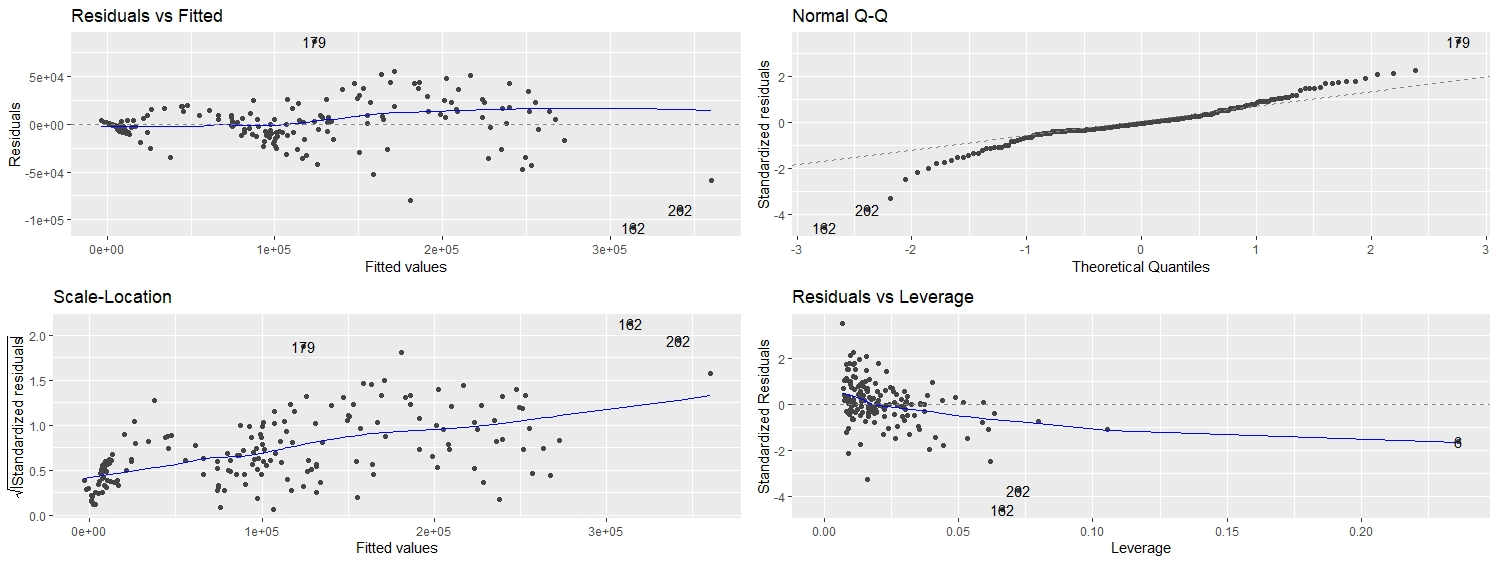


### Consideration on the incidence

In order to infer whether different countries had different death incidence we did a two sided t.test for the incidence considering all the possible combinations between the countries (total of N*(N-1)/2 ) and then stored the p-value in another dataframe.
We then calculated the mean of all the p-values obtaining **0.6912598**.
The Null-Hypothesis, being that the death incidences are differents, can not be rejected.


# Conclusions & Further Steps


## Conclusions:
After cleaning and preprocessing the data, looking carefully into the relationship between all predictors as well as their relationships with the outcome variables, we went ahead with the analysis of the data. First, we wanted to use this data to predict the number of confirmed cases based on chosen predictors.
After going through a deep analysis of different models & comparing them with respect to different metrics, we concluded that the best performing model was the following:

● Outcome variable: Global_conf 

● Predictors: Recovery and Death as 2nd degree polynomial

This model yielded us with an adjusted R-squared value of 95% which we found to be an indicator of an accurate prediction for future values.

## Further Steps:

Some further steps that should be considered is the growth rate of the global confirmed cases. As seen in our data, there was a significant increase in the confirmed cases in between the dates 23rd January 2020 to 24th August 2020 which has an exponential increase considering the precautions and other measures taken to prevent the spreading. This number may increase for upcoming days considering no availability of vaccine in near future.

The growth rate may be affected by many factors irrespective of countries like age, immune related disease, cardiovascular disease, pollution factor, diets, exercise habits and other personal hygiene practices.

That is why we believed in considering the day to day analysis of data across the globe considering the growth rate in order to predict more accurately the number of confirmed cases. This will help make informed decisions about how to take additional precautionary measures to prevent the outbreak spreading.


# Technical Appendix

### 1. Regression assumptions : 
Linear regression makes several assumptions about the data, such as :

**1.1 Linearity of the data:** The relationship between the predictor (x) and the outcome (y) is assumed to be linear.

**1.2 Normality of residuals:** The residual errors are assumed to be normally distributed.

**1.3 Homogeneity of residuals variance:** The residuals are assumed to have a constant variance (homoscedasticity)

**1.4 Independence of residuals error terms.**

###  2. Residual Distribution: 
The evidence that a linear regression model is appropriate comes in from the residual vs fitted plot, whose values are randomly dispersed around the horizontal axis, showing that the mean of residuals is really close to 0. Moreover, the Normal Q-Q plot ensures that the distribution of residuals is Gaussian one.

### 3. Regression diagnostics : 
The diagnostic plots show residuals in four different ways:

**3.1 Residuals vs Fitted.** Used to check the linear relationship assumptions. A horizontal line, without distinct patterns is an indication for a linear relationship, what is good.

**3.2 Normal Q-Q:** Used to examine whether the residuals are normally distributed. It’s good if residuals points follow the straight dashed line. “homogeneity of variance”

**3.3 Scale-Location (or Spread-Location):** Used to check the homogeneity of variance of the residuals (homoscedasticity). Horizontal line with equally spread points is a good indication of homoscedasticity. This is not the case in our example, where we have a heteroscedasticity problem.

**3.4 Residuals vs Leverage:** Used to identify influential cases, that is extreme values that might influence the regression results when included or excluded from the analysis. This plot will be described further in the next sections.


### 4. Regression Model Evaluation Metrics: 
The MSE, MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.


**4.1 MAE (Mean absolute error):** It represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
$${\displaystyle \operatorname {MAE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}}).}$$


**4.2 MSE (Mean Squared Error):** It represents the difference between the original and predicted values extracted by squared the average difference over the data set.
$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$$


**4.3 RMSE (Root Mean Squared Error):** It is the error rate by the square root of MSE.


$${\displaystyle \operatorname {RMSE} ={\sqrt{MSE}} = {\sqrt {\frac {1}{n}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}}}.}$$


where $Y_{i}$ is the original value and ${\hat {Y_{i}}}$ is the predicted one.


**4.4 R-squared (Coefficient of determination):** It represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

**4.5 Adjusted R-squared:** It is a model version of R-squared that has been adjusted for the number of predictors in the model. It increases only when an independent variable is significant and affects the dependent variable.

Formula: where is the sample adj.R2 = 1 − (1 − R2)[n − 1/n − (k + 1)] n size and k is the number of independent variables in the regression equation.

**4.6 p_value:** A predictor that has a low p_value (<0.05) indicates that we should reject the null hypothesis. In other words, a predictor that has a low p_value is likely to be a meaningful addition to our model because changes in the predictor’s value are related to changes in the response variable. Conversely, a larger (insignificant) p_value suggests that changes in the predictor are not associated with changes in response.


### 5. Cross Validation:

The basic idea behind cross validation techniques, consists of dividing the data into two sets:

a. The training set: 80% random split used to build the model.

b. The validation (test) set: 20% random split used to validate (test) the model by estimating the prediction error.

In our case, we used random split cross validation, split the data into 2 subsets. Cross Validation is a robust method for estimating the accuracy of a model.
